<a href="https://colab.research.google.com/github/yms0606/ML-study/blob/main/etc/0731.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import layers, models, utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print('train_images', type(train_images), train_images.shape, train_images.dtype)
print('train_labels', type(train_labels), train_labels.shape, train_labels.dtype)
print('test_images',type(test_images), test_images.shape, test_images.dtype)
print('test_labels', type(test_labels), test_labels.shape, test_labels.dtype)

train_images <class 'numpy.ndarray'> (60000, 28, 28) uint8
train_labels <class 'numpy.ndarray'> (60000,) uint8
test_images <class 'numpy.ndarray'> (10000, 28, 28) uint8
test_labels <class 'numpy.ndarray'> (10000,) uint8


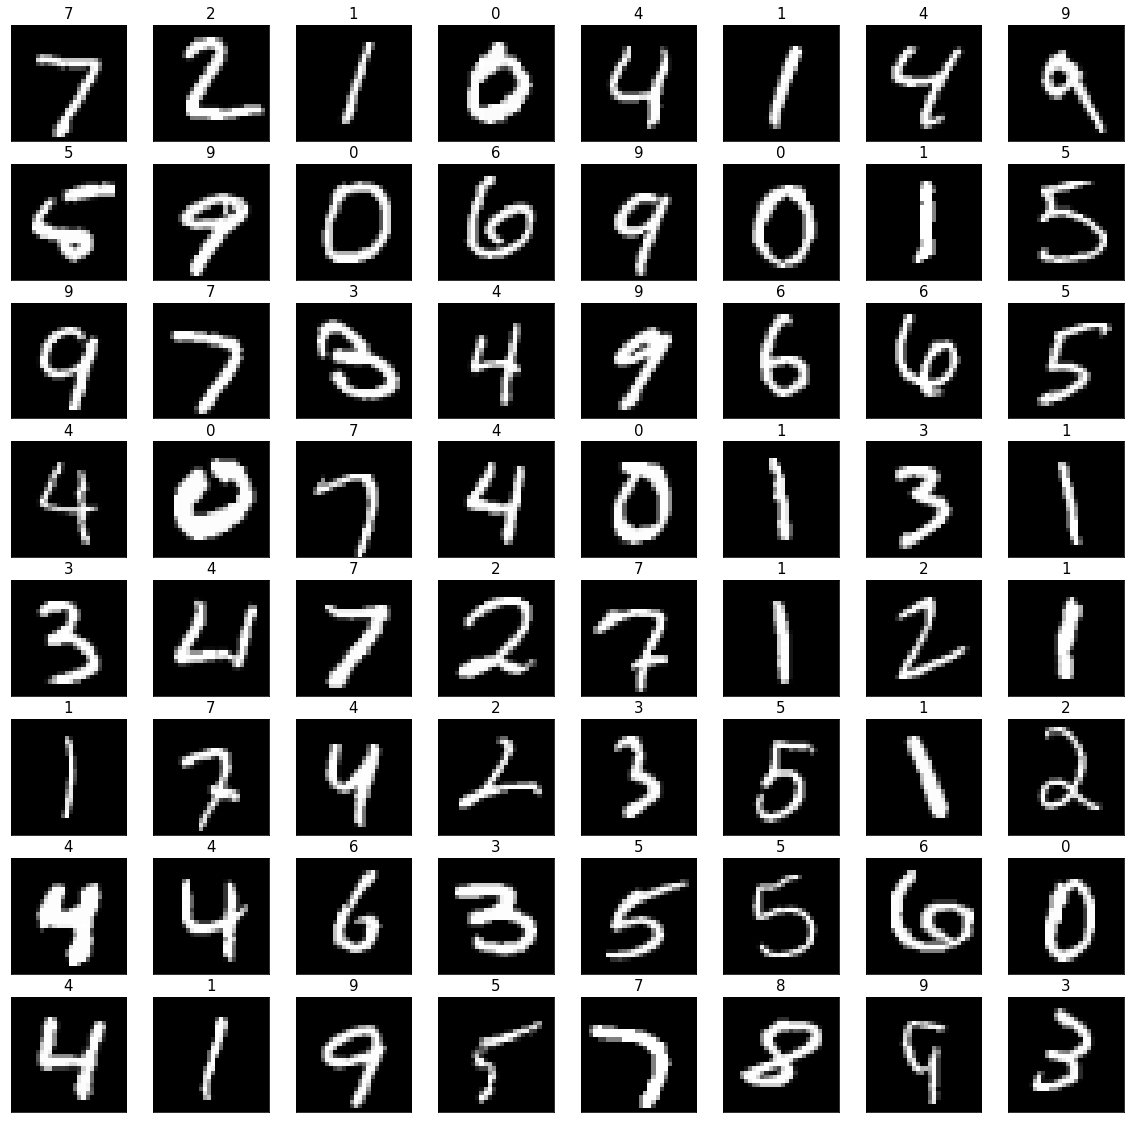

In [ ]:
plt.figure(figsize=(20,20))
for i in range(0, 8*8):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(test_labels[i], {'fontsize':15})
  plt.imshow(test_images[i], cmap="gray")


In [ ]:
_, h, w = train_images.shape
train_x = (train_images.reshape(-1,h*w)/255).astype('float32')
test_x = (test_images.reshape(-1,h*w)/255).astype('float32')
print('text_x',type(test_x), test_x.shape,test_x.dtype)

text_x <class 'numpy.ndarray'> (10000, 784) float32


In [ ]:
num_classes = 10
print('test_labels', test_labels.shape, test_labels.dtype)
print('test_labels[0] = ',test_labels[0])

train_y = utils.np_utils.to_categorical(train_labels, num_classes)
test_y = utils.np_utils.to_categorical(test_labels, num_classes)

print('test_y', test_y.shape, test_y.dtype)
print('test_y[0] =', test_y[0])

test_labels (10000,) uint8
test_labels[0] =  7
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(100,activation = 'relu', input_shape = (h*w,)))
model.add(layers.Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs = 15, batch_size = 128, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4290 - accuracy: 0.8821 - val_loss: 0.2379 - val_accuracy: 0.9342
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2096 - accuracy: 0.9407 - val_loss: 0.1774 - val_accuracy: 0.9496
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1566 - accuracy: 0.9553 - val_loss: 0.1427 - val_accuracy: 0.9599
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1242 - accuracy: 0.9650 - val_loss: 0.1285 - val_accuracy: 0.9624
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.1016 - accuracy: 0.9715 - val_loss: 0.1134 - val_accuracy: 0.9667
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0862 - accuracy: 0.9756 - val_loss: 0.1118 - val_accuracy: 0.9647
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9793 - val_loss: 0.1057 - val_accuracy: 0.9678
Epoch 

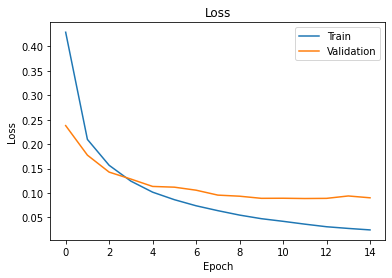

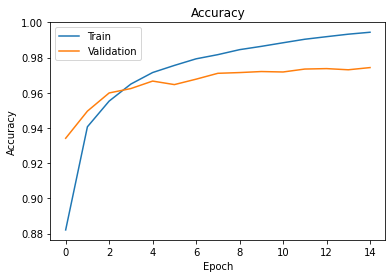

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 0)
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 0)
plt.show()

In [ ]:
evaluation = model.evaluate(test_x, test_y, batch_size = 128)
print('[loss, accuracy = ', evaluation )

79/79 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 0.9750
[loss, accuracy =  [0.08380268514156342, 0.9750000238418579]


In [ ]:
y_pred = model.predict(test_x)
print('y_pred ',y_pred.shape,y_pred.dtype)
print('y_pred[0] ',y_pred[0])

class_pred = np.argmax(y_pred, axis = 1)
print('class_pred ',class_pred.shape, class_pred.dtype)
print('class_pred[0] ',class_pred[0])

y_pred  (10000, 10) float32
y_pred[0]  [1.86706515e-07 1.34855363e-10 1.23630125e-05 2.34417873e-03
 7.09455194e-12 2.68200240e-09 9.50465072e-15 9.97637510e-01
 2.14670422e-06 3.54519830e-06]
class_pred  (10000,) int64
class_pred[0]  7


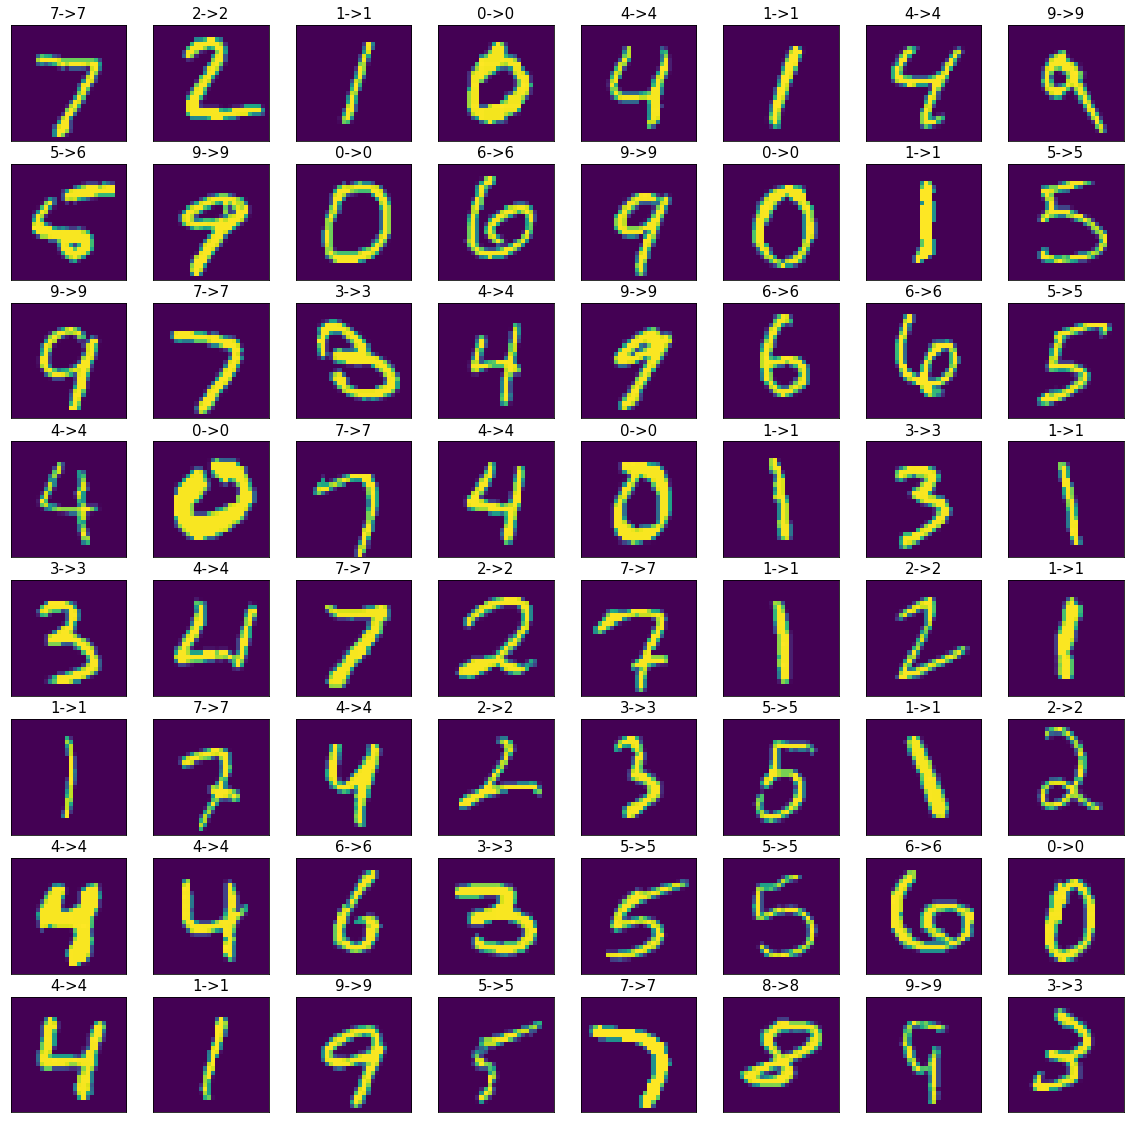

In [ ]:
plt.figure( figsize = (20,20))
for i in range(0,8*8):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(str(test_labels[i]) + '->' + str(class_pred[i]), {'fontsize': 15})
  plt.imshow(test_images[i])

In [ ]:
from keras import layers, models, utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


train_images <class 'numpy.ndarray'> (50000, 32, 32, 3) uint8
train_labels <class 'numpy.ndarray'> (50000, 1) uint8
test_images <class 'numpy.ndarray'> (10000, 32, 32, 3) uint8
test_labels <class 'numpy.ndarray'> (10000, 1) uint8


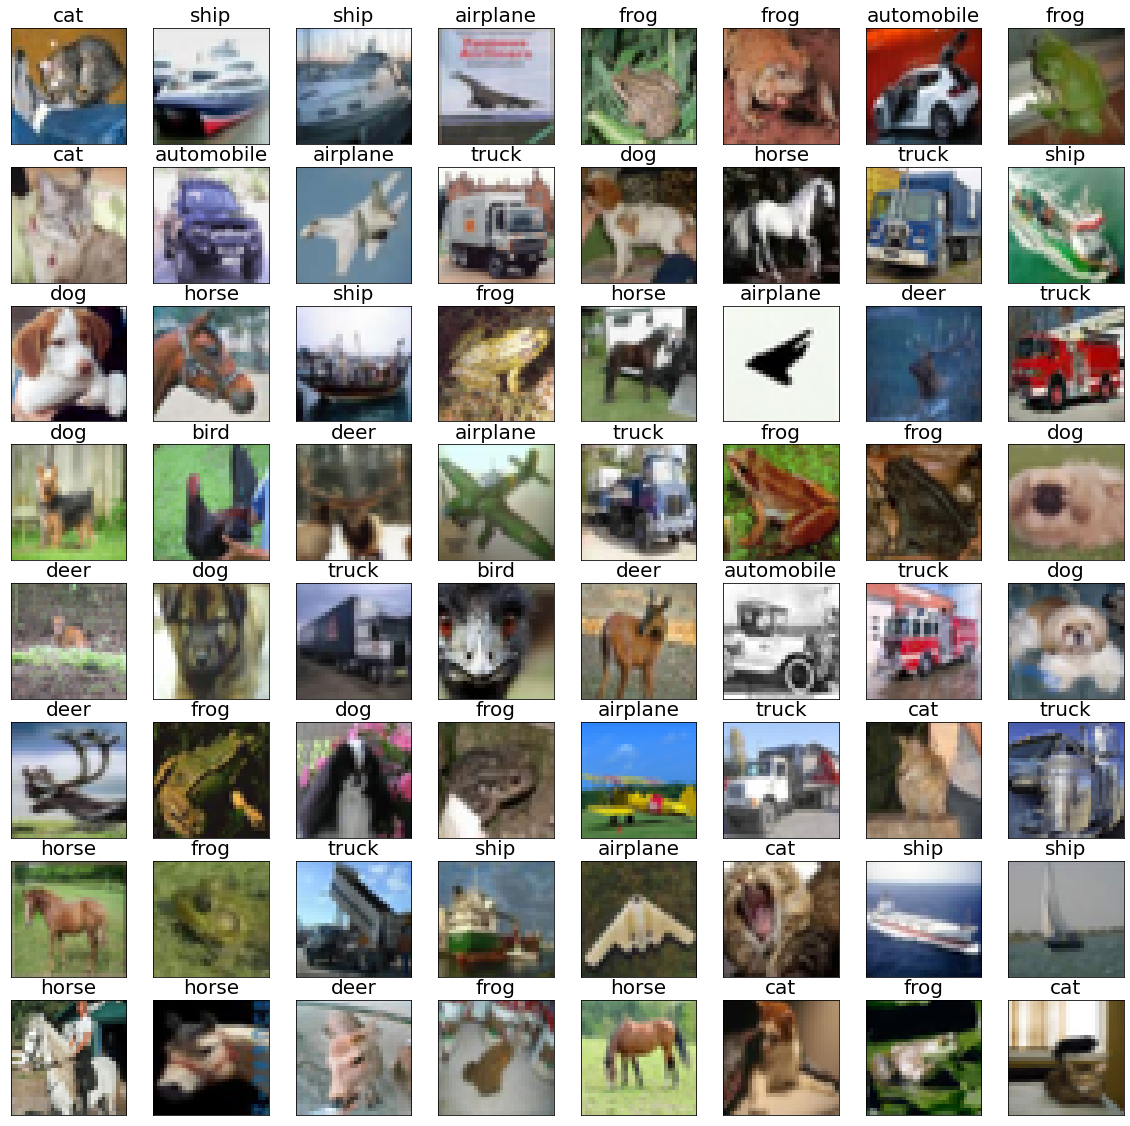

In [ ]:
print('train_images', type(train_images), train_images.shape, train_images.dtype)
print('train_labels', type(train_labels), train_labels.shape, train_labels.dtype)
print('test_images',type(test_images), test_images.shape, test_images.dtype)
print('test_labels', type(test_labels), test_labels.shape, test_labels.dtype)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(20,20))
for i in range(0, 8*8):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[test_labels[i][0]], {'fontsize':20})
  plt.imshow(test_images[i])



In [ ]:
_, h, w, c = train_images.shape
train_x = (train_images.reshape(-1,h*w*c)/255).astype('float32')
test_x = (test_images.reshape(-1,h*w*c)/255).astype('float32')
print('text_x',type(test_x), test_x.shape,test_x.dtype)

text_x <class 'numpy.ndarray'> (10000, 3072) float32


In [ ]:
num_classes = 10
print('test_labels', test_labels.shape, test_labels.dtype)
print('test_labels[0] = ',test_labels[0])

train_y = utils.np_utils.to_categorical(train_labels, num_classes)
test_y = utils.np_utils.to_categorical(test_labels, num_classes)

print('test_y', test_y.shape, test_y.dtype)
print('test_y[0] =', test_y[0])

test_labels (10000, 1) uint8
test_labels[0] =  [3]
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
model = models.Sequential()
model.add(layers.Dense(1000,activation = 'relu', input_shape = (h*w*c,)))
model.add(layers.Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 3,083,010
Trainable params: 3,083,010
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
313/313 [==============================] - 15s 46ms/step - loss: 2.0861 - accuracy: 0.2981 - val_loss: 1.8325 - val_accuracy: 0.3517
Epoch 2/20
313/313 [==============================] - 14s 45ms/step - loss: 1.7670 - accuracy: 0.3728 - val_loss: 1.7307 - val_accuracy: 0.3860
Epoch 3/20
313/313 [==============================] - 14s 45ms/step - loss: 1.6844 - accuracy: 0.4042 - val_loss: 1.7049 - val_accuracy: 0.3909
Epoch 4/20
313/313 [==============================] - 14s 45ms/step - loss: 1.6302 - accuracy: 0.4248 - val_loss: 1.6527 - val_accuracy: 0.4193
Epoch 5/20
313/313 [==============================] - 14s 45ms/step - loss: 1.5868 - accuracy: 0.4379 - val_loss: 1.6286 - val_accuracy: 0.4203
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 1.5568 - accuracy: 0.4491 - val_loss: 1.5937 - val_accuracy: 0.4351
Epoch 7/20
313/313 [==============================] - 14s 45ms/step - loss: 1.5304 - accuracy: 0.4583 - val_loss: 1.5680 - val_accuracy:

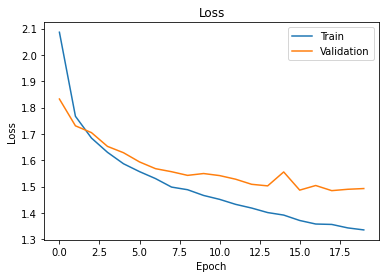

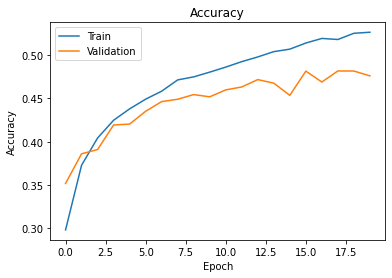

79/79 [==============================] - 1s 19ms/step - loss: 1.4749 - accuracy: 0.4793
[loss, accuracy] =  [1.4748618602752686, 0.47929999232292175]


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs = 20, batch_size = 128, validation_split=0.2)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 0)
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 0)
plt.show()

evaluation = model.evaluate(test_x, test_y, batch_size = 128)
print('[loss, accuracy] = ', evaluation)

In [ ]:
y_pred = model.predict(test_x)
print('y_pred ',y_pred.shape,y_pred.dtype)
print('y_pred[0] ',y_pred[0])

class_pred = np.argmax(y_pred, axis = 1)
print('class_pred ',class_pred.shape, class_pred.dtype)
print('class_pred[0] ',class_pred[0])



y_pred  (10000, 10) float32
y_pred[0]  [1.3044309e-02 9.0142742e-02 5.9731323e-02 4.8175621e-01 3.2969441e-02
 1.8969241e-01 1.9475581e-02 1.9835569e-04 1.1156457e-01 1.4250726e-03]
class_pred  (10000,) int64
class_pred[0]  3


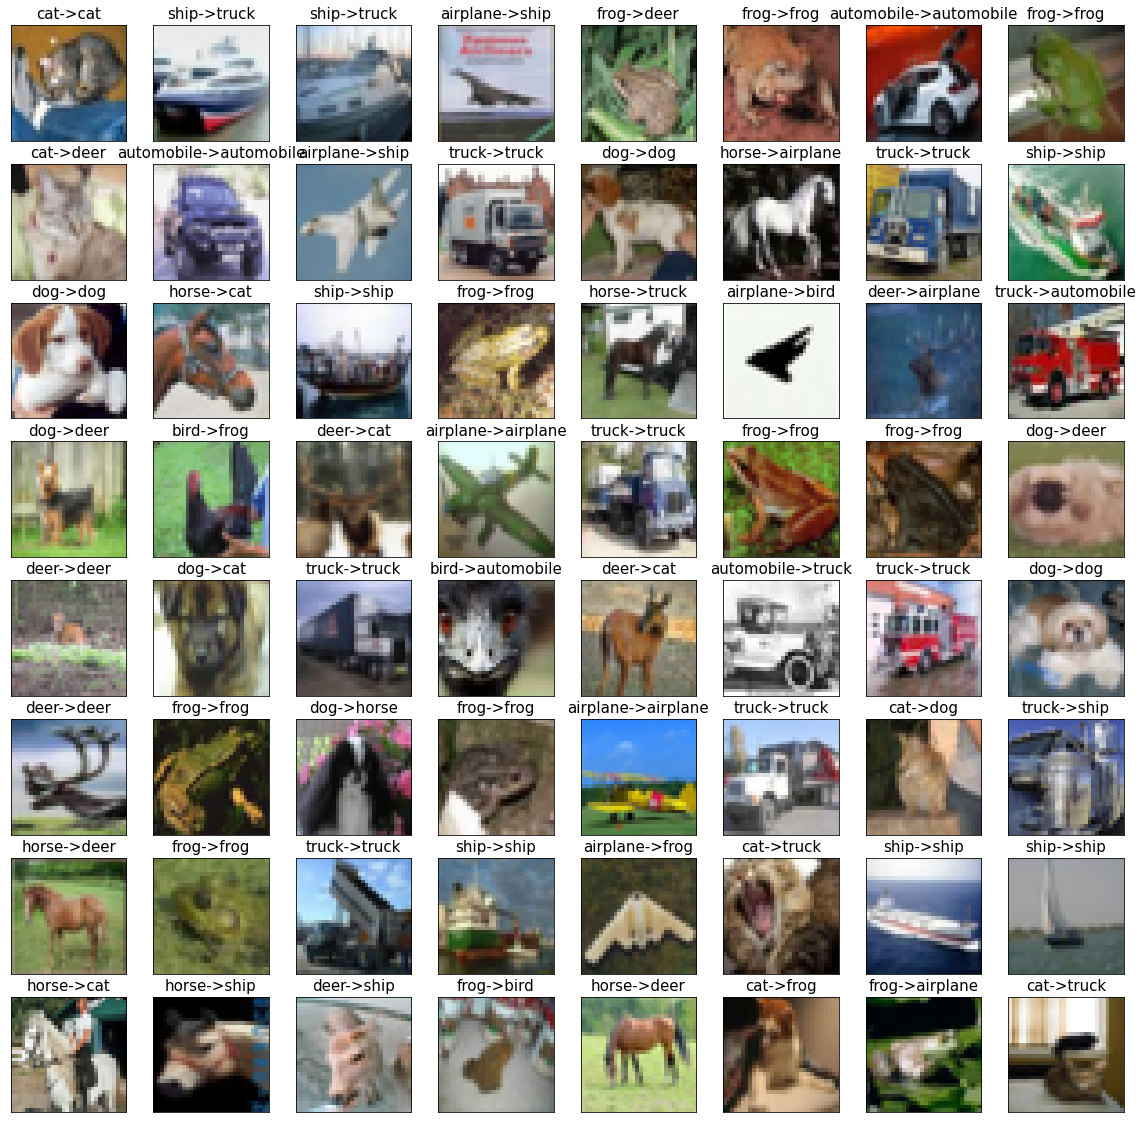

In [ ]:
plt.figure( figsize = (20,20))
for i in range(0,8*8):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(class_names[test_labels[i][0]] + '->' + class_names[class_pred[i]], {'fontsize': 15})
  plt.imshow(test_images[i])

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
scores = [[84, 87, 78], [21, 15, 84], [87, 84, 76], [100, 87, 99], [59, 99, 59], [46, 77, 56]]
names = ['철수','영이','길동','미영','순이','철이']
lectures = ['국어','수학','영어']
d2=pd.DataFrame(scores, index=names, columns=lectures)
d2

,국어,수학,영어
철수,84,87,78
영이,21,15,84
길동,87,84,76
미영,100,87,99
순이,59,99,59
철이,46,77,56


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

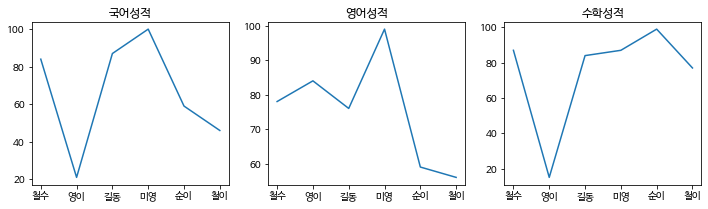

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,3))
sub1 = fig.add_subplot(1,3,1)
sub2 = fig.add_subplot(1,3,2)
sub3 = fig.add_subplot(1,3,3)

sub1.plot(d2.index, d2['국어'])
sub2.plot(d2.index, d2['영어'])
sub3.plot(d2.index, d2['수학'])
sub1.set_title('국어성적')
sub2.set_title('영어성적')
sub3.set_title('수학성적')
fig.show()

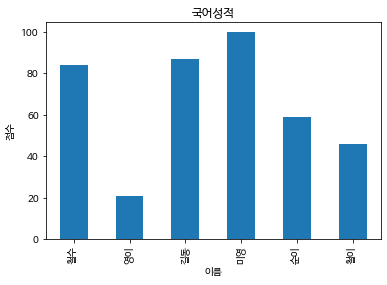

In [ ]:
d2['국어'].plot(kind='bar')
plt.title('국어성적')
plt.ylabel('점수')
plt.xlabel('이름')
plt.show()

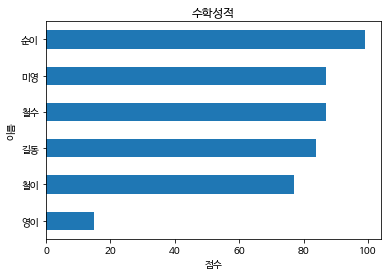

In [ ]:
sorted_math = d2.sort_values(by='수학')
sorted_math['수학'].plot(kind='barh')
plt.title('수학성적')
plt.ylabel('이름')
plt.xlabel('점수')
plt.show()

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


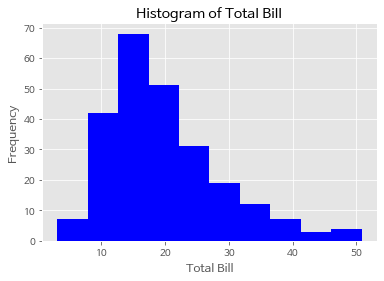

In [ ]:
plt.style.use('ggplot')
tips['total_bill'].plot(kind='hist', bins=10, color='blue')
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.show()

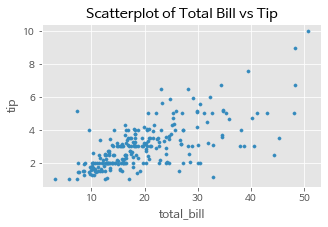

In [ ]:
tips.plot(kind='scatter', x='total_bill', y='tip', s=10, figsize=(5,3))
plt.title('Scatterplot of Total Bill vs Tip')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


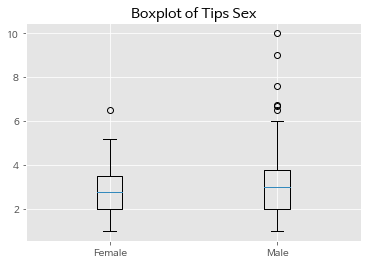

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()
plt.title('Boxplot of Tips Sex')
plt.boxplot(x=[tips[tips['sex']=='Female']['tip'],tips[tips['sex']=='Male']['tip']],labels=['Female','Male'])
plt.show()